# Fibre Orientation and Anisotropy Tensor


In [1]:
import os
import sys
os.chdir('..')  # changing to a higher dir to access custom modules
cwd = os.getcwd()
sys.path.append(cwd)

import numpy as np  # numpy for matrix, linear-algebra, and other numerical studies.
import warnings  # to send warnings to user.
import pandas as pd  # pandas for handling data similar to spreadsheet.
import matplotlib as mpl  # matplotlib for plots
import matplotlib.pyplot as plt  # for plots
import seaborn as sb  # for styling of plots
from PyImModules.matplotlib_settings import *

mpl.rcParams['figure.dpi'] = 150  # Reducing resolution of plots for better viewability in notebook.
%config Completer.use_jedi = False  # To avoid delays in autocompletion during coding.


Bad key "text.kerning_factor" on line 4 in
C:\Users\z5218869\Miniconda3\envs\pyimgc38\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# FIBRE ORIENTATION


def generate_angle_distribution(size, angle_domain=(-90, 90), angle_distr='uniform', **kwargs):
    """
    Function to generate required statistical distribution of orientation angles.

    :param size: Number of values to be returned.
    
    :type size: int
    
    :param angle_domain: Angle values returned lie within this domain.
    
    :param angle_distr: Single numeric value will give same value repeated 'size' times.
    Use 'random' to randomly choose a constant numeric angular value. 
    Use 'uniform' and 'normal' for corresponding distributions. 
    Note that use of 'normal' requires kwargs 'mean' and 'std', 
    and returns both positive and negative values.
    
    :param kwargs: 'mean' and 'std' for normal distribution.

    :return: numpy ndarray of angles.

    """
    size = int(size)
    low, high = angle_domain
    if type(angle_distr) in (float, int): # single numeric value for angle
        # check if given value is within the specified domain.
        message = "given value of angle_distr: {} outside domain {}".format(angle_distr, angle_domain)
        assert low < angle_distr < high, message  # exec halted; message printed if condition not satisfied
        anglevals = np.array([angle_distr] * size)
    elif angle_distr == 'random':  # random choice of values
        anglevals = np.array(list(np.random.randint(low, high, 1)) * size)  # choosing integer is fine.
    elif angle_distr == 'uniform': # uniform choice of values, ensures equal probability for all values.
        anglevals = np.random.uniform(low, high, size=size)
    elif angle_distr == 'normal':  # follows a normal distribution, more values centred around mean.
        # In normal distr, 99.99% values lies within 3*sigma.
        loc = kwargs['mean']
        scale = kwargs['std']
        if scale > 30:  # unlikely situation
            warnings.warn("Resetting std > 30 back to 30 degrees.")
            scale = 30
        anglevals = np.random.normal(loc, scale, size=size)
    else:
        print("Invalid entry to angle_distr")
        raise ValueError
    return anglevals


def angle_sumamry(angle_values):
    """Return basic statistics - min, max, and mean of the angle distribution."""
    return np.min(angle_values), np.max(angle_values), np.mean(angle_values)

## Three-Dimensional Isotropic Distribution of Fibres
A numerical example of three-dimensional isotropic orientation distribution of fibres is set to prove the concept of retrieving three-dimensional orientation information from two-dimensional projections. The example consists of a list of fibre orientations in terms of the spherical coordinates $\theta$ and $\phi$.

In [3]:
# 3D Isotropy

Nfibres = 1000
phivals = generate_angle_distribution(Nfibres, angle_domain=(-90, 90))  # degrees
iud_vals = np.random.rand(Nfibres)
thetavals = np.rad2deg(np.arccos(1 - 2*iud_vals)) - 90 # degrees

print("Summary of phi: ")
print("min: {}, max: {}, mean: {}".format(*angle_sumamry(phivals)))
print("Summary of theta: ")
print("min: {}, max: {}, mean: {}, mean_abs: {}".format(*angle_sumamry(thetavals), np.mean(np.abs(thetavals))))

Summary of phi: 
min: -89.82964785334559, max: 89.92591510733621, mean: 0.2160953948887319
Summary of theta: 
min: -85.03984740931364, max: 88.76705002572487, mean: 0.4907959217811107, mean_abs: 32.93472016234276


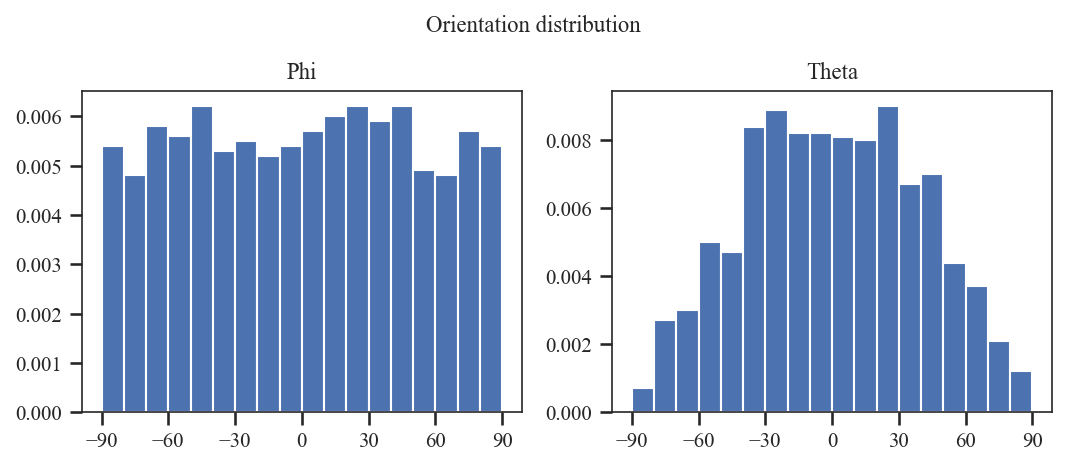

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(7, 3))
axs = axes.ravel()

# Phi
ax = axs[0]
h, b, _ = ax.hist(phivals, bins=np.arange(-90, 91, 10), density=True)
ax.set_title('Phi')
ax.set_xticks(b[::3])

# Theta
ax = axs[1]
h, b, _ = ax.hist(thetavals, bins=np.arange(-90, 91, 10), density=True)
ax.set_title('Theta')
ax.set_xticks(b[::3])

fig.suptitle('Orientation distribution')
plt.show()

Min values:  (0.001105484618695195, -0.9981228170459934, -0.9962550712418086)
Max values:  (0.9987705837077031, 0.9978390201116447, 0.9997684744672535)
Residual of error in determination of quadrant:  0.0070618577219388485


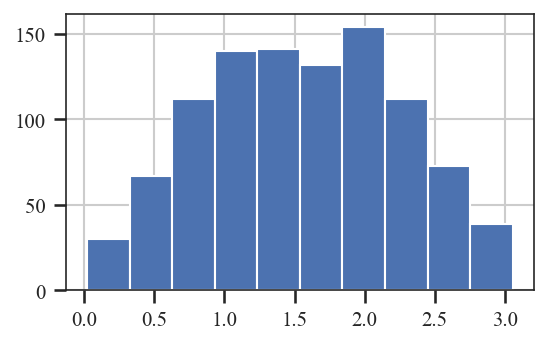

In [5]:
# Converting numpy arrays to pandas dataframe
phi_rad = np.deg2rad(phivals)  # values in radians
th_rad  = np.deg2rad(thetavals)

df = {}
df['Phi (deg)'] = phivals
df['Phi'] = phi_rad
df['Theta (deg)'] = thetavals
df['Theta'] = th_rad
df = pd.DataFrame(df)

# Direction cosines
# l, m, n are direction cosines w.r.t. x, y, and z axes.
c = np.cos(th_rad)
l = c * np.cos(phi_rad)  # dir. cosine w.r.t. x-axis
m = c * np.sin(phi_rad)  # dir. cosine w.r.t. y-axis
n = np.sin(th_rad)  # dir. cosine w.r.t. z-axis

print("Min values: ", tuple(item.min() for item in (l, m, n)))
print("Max values: ", tuple(item.max() for item in (l, m, n)))
# Direction angles: Angles subtended by fibre with axes x, y, an z, corresponding to direction cosines l, m, and n respectively.
# TODO: check whether the angles are in the right octant of space.
df['alpha_x']  = np.arctan2(m, l)  # quadrant of alpha_y confirmed, range: (-pi/2, pi/2)
df['alpha_y']  = np.arccos(m)  # quadrant of alpha_y confirmed, range: (0, pi)
df['alpha_z']  = np.arccos(n)  # quadrant of alpha_z confirmed, range: (0, pi)

df['alpha_z'].hist()

# verification of quadrant:
norm = np.linalg.norm
res_quadrant = norm(np.cos(df['alpha_x']) - l) \
             + norm(np.cos(df['alpha_y']) - m) \
             + norm(np.cos(df['alpha_z'] ) - n)
print("Residual of error in determination of quadrant: ", res_quadrant / len(df['alpha_x']))

-1.5686650449210917 1.568322799641893


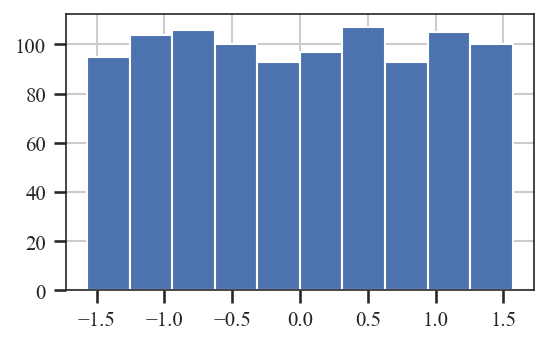

In [6]:
# Angles on planes: angles subtended by projections of fibres on xy, xz, and yz planes.
df['alpha_xy'] = np.arctan2(m, l)
df['alpha_xz'] = np.arctan(n/l)
df['alpha_yz'] = np.arctan(n/m)

df['alpha_xz'].hist()
# plt.hist(alpha_xz)
print(df['alpha_xz'].min(), df['alpha_xz'].max())
# df.to_excel("3Disotropic.xlsx")

In [7]:
# 2D Distribution Tensor

def distribution_tensor_2D(alpha_ij):
    c = np.cos(alpha_ij)
    s = np.sin(alpha_ij)
    return np.array([[np.dot(c, c), -np.dot(c, s)], [-np.dot(s, c), np.dot(s, s)]]) / len(alpha_ij)

def anisotropy_tensor_2D(alpha_ij):
    D = distribution_tensor_2D(alpha_ij=alpha_ij)
    return D - 0.5*np.eye(2)

In [8]:
Dxy = distribution_tensor_2D(df['alpha_xy'])
Dxz = distribution_tensor_2D(df['alpha_xz'])
Dyz = distribution_tensor_2D(df['alpha_yz'])
print("\nDxy = \n", Dxy)
print("\nDxz = \n", Dxz)
print("\nDyz = \n", Dyz)

Axy = anisotropy_tensor_2D(df['alpha_xy'])
Axz = anisotropy_tensor_2D(df['alpha_xz'])
Ayz = anisotropy_tensor_2D(df['alpha_yz'])
print("\nAxy = \n", Axy)
print("\nAxz = \n", Axz)
print("\nAyz = \n", Ayz)


Dxy = 
 [[ 0.51118754 -0.00184058]
 [-0.00184058  0.48881246]]

Dxz = 
 [[0.50137449 0.00281283]
 [0.00281283 0.49862551]]

Dyz = 
 [[0.49384946 0.01131851]
 [0.01131851 0.50615054]]

Axy = 
 [[ 0.01118754 -0.00184058]
 [-0.00184058 -0.01118754]]

Axz = 
 [[ 0.00137449  0.00281283]
 [ 0.00281283 -0.00137449]]

Ayz = 
 [[-0.00615054  0.01131851]
 [ 0.01131851  0.00615054]]


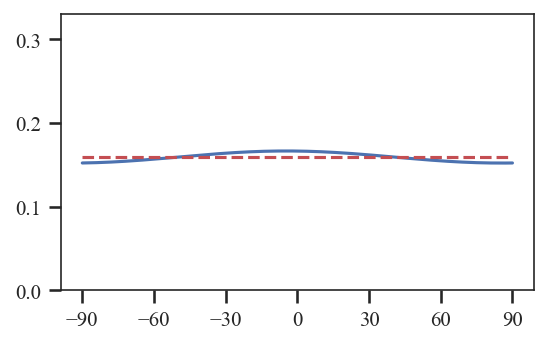

In [9]:
phi_theo_deg = np.arange(-90, 91, 1)
phi_theo = np.deg2rad(phi_theo_deg)
c = np.cos(phi_theo)
s = np.sin(phi_theo)
A = Axy.ravel()
Af = A[0]*(c*c - 0.5) + A[1]*(c*s) + A[2]*(s*c) + A[3]*(s*s - 0.5)
p_phi = 1/(2*np.pi) + (2/np.pi) * Af

f = plt.figure()
ax = f.gca()
ax.plot(phi_theo_deg, p_phi)
ax.plot(phi_theo_deg, [1/(2*np.pi)]*len(phi_theo), 'r--')
ax.set_ylim([0, 0.33])
ax.set_xticks(phi_theo_deg[::30])

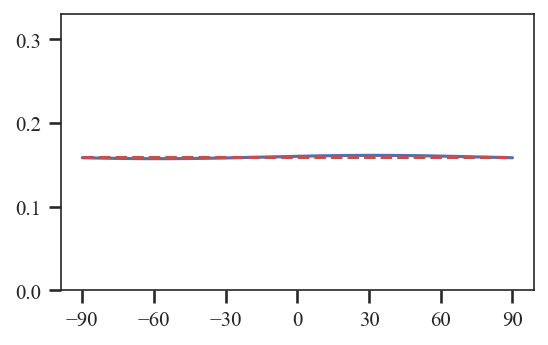

In [10]:
alpha_theo_deg = np.arange(-90, 91, 1)
alpha_theo = np.deg2rad(alpha_theo_deg)
c = np.cos(alpha_theo)
s = np.sin(alpha_theo)
A = Axz.ravel()
Af = A[0]*(c*c - 0.5) + A[1]*(c*s) + A[2]*(s*c) + A[3]*(s*s - 0.5)
p_alpha =  1/(2*np.pi) + (2/np.pi) * Af

f = plt.figure()
ax = f.gca()
ax.plot(alpha_theo_deg, p_alpha)
ax.plot(alpha_theo_deg, [1/(2*np.pi)]*len(alpha_theo), 'r--')
ax.set_ylim([0, 0.33])
ax.set_xticks(alpha_theo_deg[::30])

32761 <class 'numpy.ndarray'>
(181, 181)
-1.5707963267948966 1.5707963267948966


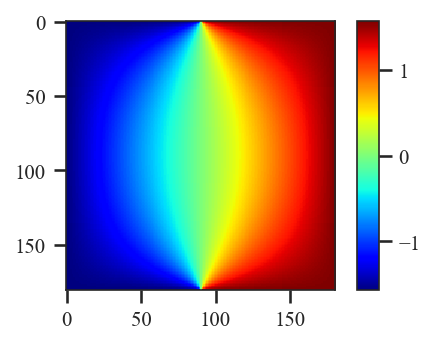

In [11]:
from itertools import product
theta_mat = np.array([np.arctan(np.tan(alpha)/np.cos(phi)) \
                       for phi, alpha in product(phi_theo, alpha_theo)])
print(len(theta_mat), type(theta_mat))
theta_mat = theta_mat.reshape((len(phi_theo), len(alpha_theo)))
print(theta_mat.shape)
print(theta_mat.min(), theta_mat.max())

plt.imshow(theta_mat, cmap='jet')
plt.colorbar()

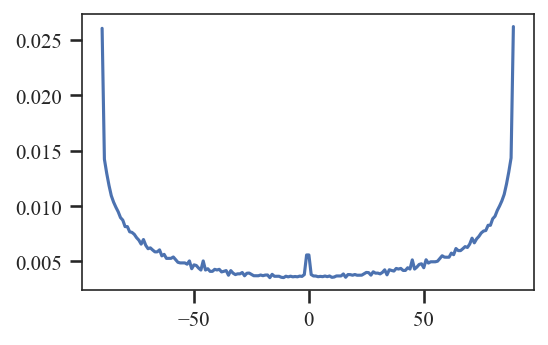

In [12]:
p_joint = np.array([p1*p2 for p1, p2 in product(p_phi, p_alpha)])
p_joint = p_joint.reshape((len(p_phi), len(p_alpha)))

theta_theo_deg = np.arange(-90, 90, 1)
theta_theo = np.deg2rad(theta_theo_deg)
dth = np.deg2rad(1)

p_theta = []
for th in theta_theo:
    mask = (theta_mat >= th) & (theta_mat <= th+dth)
    p = np.sum(p_joint * mask)
    p_theta.append(p)
p_theta = np.array(p_theta) / np.sum(p_joint)

plt.plot(theta_theo_deg, p_theta)

In [13]:
c_phi = np.cos(phi_theo)
s_phi = np.sin(phi_theo)
c_tht = np.cos(theta_theo)
s_tht = np.sin(theta_theo)

xixi = np.average(s_tht**2, weights=p_theta) * np.average(c_phi**2, weights=p_phi)
xiyi = np.average(s_tht**2, weights=p_theta) * np.average(c_phi*s_phi, weights=p_phi)
xizi = np.average(s_tht*c_tht, weights=p_theta) * np.average(c_phi, weights=p_phi)

yiyi = np.average(s_tht**2, weights=p_theta) * np.average(s_phi**2, weights=p_phi)
yizi = np.average(s_tht*c_tht, weights=p_theta) * np.average(s_phi, weights=p_phi)

zizi = np.average(c_tht**2, weights=p_theta)

D = np.array([[xixi, xiyi, xizi],
              [xiyi, yiyi, yizi],
              [xizi, yizi, zizi]],
             dtype=np.float16
            )

print("Orientation tensor: \n", D)

Orientation tensor: 
 [[ 3.210e-01 -1.156e-03  2.989e-03]
 [-1.156e-03  3.103e-01 -1.448e-05]
 [ 2.989e-03 -1.448e-05  3.684e-01]]
